
# Linear Classifier : Perceptron

###Question 1:
**The space complexity and time complexity :** \\

**1.a)** The computational/time complexity of the basic perceptron algorithm: \
The answer is **O(n*m)**: because we have two loops. The first loop has n iterations while the second loop has m iterations which is the number of instances in the dataset. \\

**1.b)** The space complexity of the basic perceptron algorithm. \
The answer is **O(n*d)**: because we have m inputs and each one of them has d dimensions.

# Section 2: Installation

In [23]:
!pip install sklearn
!pip install numpy
!pip install matplotlib

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/configuration.py", line 27, in <module>
 

# Section 3:Implementation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

**Generating the dataset**

In [25]:

def split_data(u1,u2,sigma,num):

  X1 = sigma * np.random.randn(num,2)+u1 # Generating the first 125 xi that have label yi = −1.
  X2 = sigma * np.random.randn(num,2)+u2 # Generating the last 125 xi that have label yi = 1.
  X = np.concatenate((X1,X2),axis=0) # concatenating the data.
  y=np.full(num,-1)
  y=np.append(y,np.full(num,1))
  return train_test_split(X,y,test_size=0.2,random_state=42)

**Perceptron Algorithm**

In [26]:
def perceptron(n):
  w=np.array([0,0,0])
  x=''
  for t in range(0,n):
    Wold=w
    for i in range(0,len(X_train)):
      x=np.insert(X_train[i],0,1)
      if(y_train[i]*np.dot(w,x)<=0):
        w=Wold+y_train[i]*x
    print("W= ",w)
    if(np.array_equal(w,Wold)):
      print("done!")
      return Wold
  return w

In [27]:
def predict(X,w):
  y_pred=np.full(len(X),0)
  for i in range(0,len(X)):
    x=np.insert(X[i],0,1)
    if np.dot(w,x) <= 0.0:
      y_pred[i]= -1
    else:
      y_pred[i]= 1
  return y_pred

## **Experiment 1**

In [28]:
u1=[-1,0]
u2=[1,0]
std=0.5
X_train,X_test,y_train,y_test = split_data(u1 ,u2,std, 125)

In [29]:
print(X_train.shape)
print(y_train.shape)

(200, 2)
(200,)


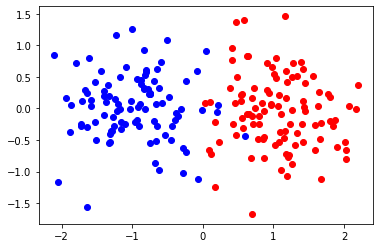

In [30]:
for i in range(0,len(X_train)):
    plt.plot(X_train[i,0],X_train[i,1],'ro' if (y_train[i] == 1.0) else 'bo')

In [31]:
W=perceptron(100)
print(W)

W=  [-1.          0.77871922 -0.30417567]
W=  [ 0.          1.58000781 -0.42160882]
W=  [ 1.          2.00197395 -0.66326805]
W=  [ 0.          1.39771387 -0.2262298 ]
W=  [ 1.          1.81968001 -0.46788903]
W=  [ 0.          1.77277298 -1.38214549]
W=  [-1.          1.72586595 -2.29640194]
W=  [ 0.          2.19662014 -0.93242191]
W=  [-1.          2.14971311 -1.84667837]
W=  [ 0.          2.73047705 -0.44285024]
W=  [-1.          2.68357002 -1.3571067 ]
W=  [ 0.          3.10553616 -1.59876593]
W=  [-1.          3.05862913 -2.51302239]
W=  [ 0.          3.63939306 -1.10919426]
W=  [-1.          3.59248603 -2.02345072]
W=  [ 0.          4.06324023 -0.65947069]
W=  [-1.          4.0163332  -1.57372714]
W=  [ 0.          4.50255631 -1.07901369]
W=  [-1.          4.45564928 -1.99327015]
W=  [ 0.          4.94187239 -1.49855669]
W=  [-1.          4.89496536 -2.41281315]
W=  [ 0.          5.36571955 -1.04883312]
W=  [-1.          5.31881252 -1.96308957]
W=  [ 0.          5.80503563 -1.46

**Result**

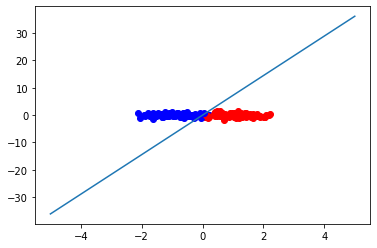

In [32]:

for i in range(len(X_train)):
  plt.plot(X_train[i,0],X_train[i,1],'ro' if (y_train[i] == 1.0) else 'bo')

x_vals= np.linspace(-5, 5, 10)
if(W[2]==0):
  y_vals=x_vals
else: 
  slope = -(W[1]/W[2])
  intercept = -W[0]/W[2]
  y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals)
plt.show()

**Question 1: Does the algorithm converges? Why?** \
The algorithm doesn't converge because the datapoints are not linearly separable.

**Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?** \
The decision boundry isn't unique and changing the initialisation doesn't change the result of the algorithm.

**Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set** \


In [33]:
accuracy_score(y_pred=predict(X_test,W),y_true=y_test)

0.98

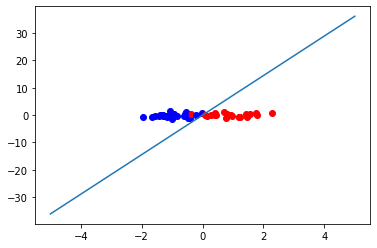

In [34]:
for i in range(len(X_test)):
  plt.plot(X_test[i,0],X_test[i,1],'ro' if (y_test[i] == 1.0) else 'bo')

x_vals= np.linspace(-5, 5, 10)
if(W[2]==0):
  y_vals=x_vals
else: 
  slope = -(W[1]/W[2])
  intercept = -W[0]/W[2]
  y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals)
plt.show()

## Experiment 2:

In [35]:
u1=[-1,0]
u1=[1,0]
std=0.86
X_train,X_test,y_train,y_test = split_data(u1 ,u2,std, 125)

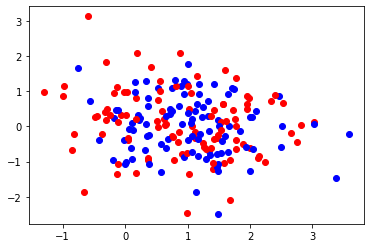

In [36]:
for i in range(0,len(X_train)):
    plt.plot(X_train[i,0],X_train[i,1],'ro' if (y_train[i] == 1.0) else 'bo')

In [37]:
W=perceptron(100)
print(W)

W=  [1.         1.15078668 1.45030368]
W=  [ 0.         -0.39939365  1.8542378 ]
W=  [-1.          0.16415396  1.12404082]
W=  [0.         1.31494064 2.5743445 ]
W=  [-1.         -0.23523969  2.97827862]
W=  [-2.          0.32830792  2.24808164]
W=  [-1.          1.4790946   3.69838532]
W=  [-2.          0.56427908  3.61611958]
W=  [-3.          1.12782669  2.8859226 ]
W=  [-2.          1.90102785  2.59145738]
W=  [-3.          0.35084752  2.9953915 ]
W=  [-2.          1.12404868  2.70092628]
W=  [-3.         -0.42613165  3.1048604 ]
W=  [-2.          0.34706951  2.81039518]
W=  [-3.          0.91061712  2.0801982 ]
W=  [-2.          1.68381828  1.78573298]
W=  [-3.          0.13363794  2.1896671 ]
W=  [-2.          0.9068391   1.89520188]
W=  [-1.          2.05762578  3.34550556]
W=  [-2.          0.50744545  3.74943968]
W=  [-3.          1.07099306  3.0192427 ]
W=  [-2.          1.84419422  2.72477748]
W=  [-3.          0.29401389  3.1287116 ]
W=  [-2.          1.06721505  2.83424638

**Result**

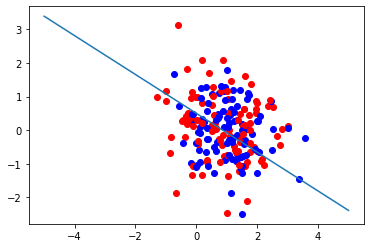

In [38]:
for i in range(len(X_train)):
  plt.plot(X_train[i,0],X_train[i,1],'ro' if (y_train[i] == 1.0) else 'bo')

x_vals= np.linspace(-5, 5, 10)
if(W[2]==0):
  y_vals=x_vals
else: 
  slope = -(W[1]/W[2])
  intercept = -W[0]/W[2]
  y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals)
plt.show()

**Question 1: Does the algorithm converges? Why?** \
The algorithm doesn't converge because the datapoints are not linearly separable.

**Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?** \
The decision boundry isn't unique and changing the initialisation doesn't change the result of the algorithm.


**Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.**

In [39]:
accuracy_score(y_pred=predict(X_test,W),y_true=y_test)

0.58

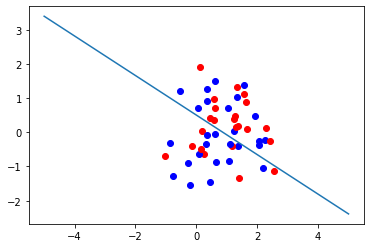

In [40]:
for i in range(len(X_test)):
  plt.plot(X_test[i,0],X_test[i,1],'ro' if (y_test[i] == 1.0) else 'bo')

x_vals= np.linspace(-5, 5, 10)
if(W[2]==0):
  y_vals=x_vals
else: 
  slope = -(W[1]/W[2])
  intercept = -W[0]/W[2]
  y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals)
plt.show()

## Experiment 3:

In [41]:
def calculate_error(X_test, y_test,weights):
  e=0
  for xi, yi in zip(X_test, y_test):
    xi = np.insert(xi, 0, 1)
    if np.dot(weights,np.transpose(xi))*yi <=0:
      e+=1
  return e /float(len(y_test))


In [42]:
sigmas = [0.01, 0.1, 0.5, 0.7]
num_experiments=30
u1=[-1,0]
u2=[1,0]
vars=[]
means=[]
error=[]

W=  [-1.          0.99249597 -0.00225914]
W=  [ 0.          1.99813359 -0.0123986 ]
W=  [ 0.          1.99813359 -0.0123986 ]
done!
W=  [1.         1.0078102  0.00658719]
W=  [0.         1.99855105 0.00475009]
W=  [0.         1.99855105 0.00475009]
done!
W=  [-1.          1.00911427  0.00361447]
W=  [ 0.          1.99527257 -0.00681633]
W=  [ 0.          1.99527257 -0.00681633]
done!
W=  [-1.          0.98834606 -0.00186896]
W=  [ 0.          1.99187002 -0.0037724 ]
W=  [ 0.          1.99187002 -0.0037724 ]
done!
W=  [-1.          1.00289794  0.0069605 ]
W=  [ 0.00000000e+00  1.99674693e+00 -4.50039278e-04]
W=  [ 0.00000000e+00  1.99674693e+00 -4.50039278e-04]
done!
W=  [-1.00000000e+00  1.01023080e+00 -5.20153505e-04]
W=  [0.         1.99953429 0.00586063]
W=  [0.         1.99953429 0.00586063]
done!
W=  [-1.00000000e+00  9.96499947e-01 -8.22224884e-04]
W=  [ 0.          1.99499603 -0.007667  ]
W=  [ 0.          1.99499603 -0.007667  ]
done!
W=  [ 1.          1.0008015  -0.00767373]
W

Text(0.5, 1.0, 'Line plot of the error')

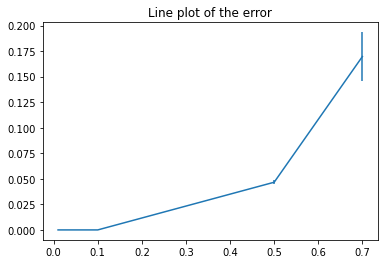

In [43]:
for i in range(len(sigmas)):
  e=[]
  for j in range(num_experiments):
    X_train, X_test, y_train, y_test = split_data(u1,u2,sigmas[i],250)

    W = perceptron(num_experiments)
    e.append(calculate_error(X_test, y_test,W))
  error.append(e)
  vars.append(np.var(error[i]))
  means.append(np.mean(error[i]))
print("Variances : ",vars,"\nMeans : ",means)
plt.figure()
plt.errorbar(sigmas,means,yerr=vars)
plt.title("Line plot of the error")

**Comment the result** \
When the variance increases the error increases